# 1.matplotlib库的使用

## 散点图的绘制

数据采集自：https://lishi.tianqi.com/dongguan/index.html 

In [18]:
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import font_manager

### 分析东莞3月与12月的最低气温变化分布情况

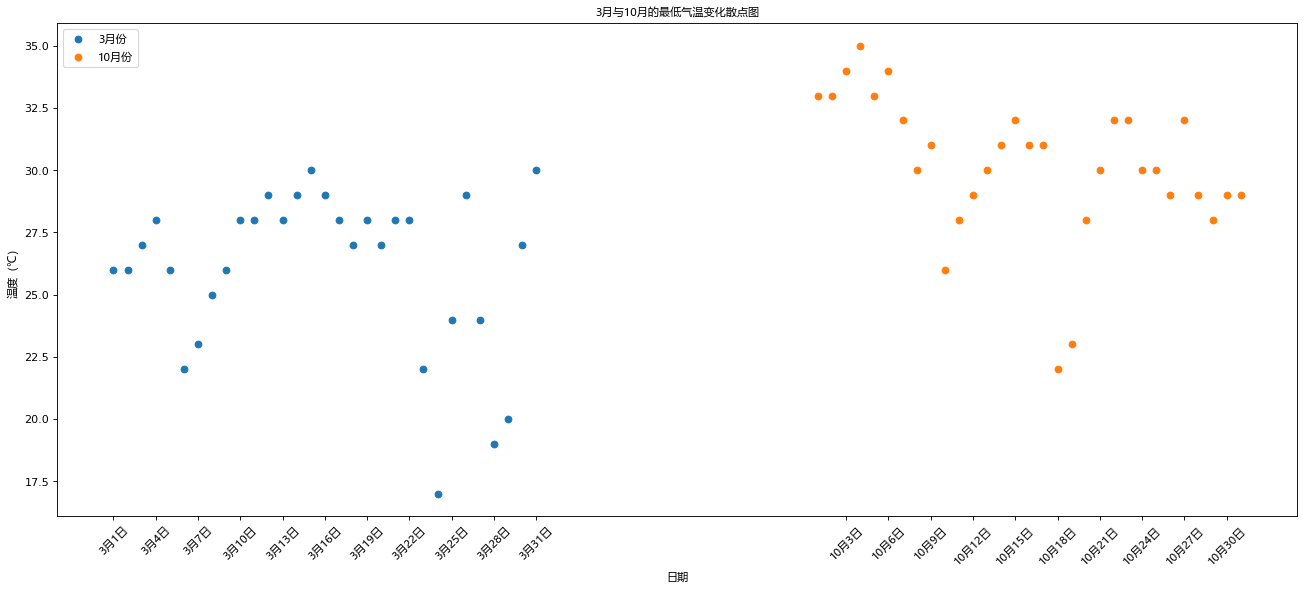

In [35]:
font = font_manager.FontProperties(fname="C:\Windows\Fonts\msyh.ttc")
# y_3 = [17, 18, 17, 16, 17, 14, 13, 12, 14, 17, 18, 18, 20, 20, 20, 22, 21, 19, 21, 21, 22, 21, 13, 13, 16, 21, 15, 14, 16, 20, 22] 
# y_10 = [24, 24, 24, 25, 25, 25, 23, 22, 21, 18, 17, 19, 20, 21, 22, 21, 15, 16, 18, 21, 23, 20, 22, 21, 20, 20, 19, 22, 22, 20, 19]
y_3 = [26, 26, 27, 28, 26, 22, 23, 25, 26, 28, 28, 29, 28, 29, 30, 29, 28, 27, 28, 27, 28, 28, 22, 17, 24, 29, 24, 19, 20, 27, 30]
y_10 = [33, 33, 34, 35, 33, 34, 32, 30, 31, 26, 28, 29, 30, 31, 32, 31, 31, 22, 23, 28, 30, 32, 32, 30, 30, 29, 32, 29, 28, 29, 29]
# 设置图形大小
plt.figure(figsize=(20,8), dpi=80)

x_3 = range(1, 32)
x_10 = range(51,82)

# 使用scatter方法绘制散点图
plt.scatter(x_3, y_3, label='3月份')
plt.scatter(x_10, y_10, label='10月份')

# 设置x轴显示中文
x_ticks = list(x_3) + list(x_10)
x_labels = [f"3月{i}日" for i in x_3]
x_labels += [f"10月{i-50}日" for i in x_10]  # 因为date_y是从51开始，所以减50
# 设置步长让x轴显稀疏些
plt.xticks(x_ticks[::3], x_labels[::3], fontproperties=font, rotation=45)

# 添加描述信息
plt.xlabel("日期", fontproperties=font)
plt.ylabel("温度（℃）", fontproperties=font)
plt.title("3月与10月的最低气温变化散点图", fontproperties=font)

# 添加图例
plt.legend(prop=font, loc='upper left')

plt.show()

### 数据采集

In [34]:
# -*- coding:utf-8 -*-
# @Author:🎈RedBalloon
# @Time:2023/2/8-22:34
# @File:tt.py
import requests
from lxml import etree
import re
"""采集2022年的气温信息"""

url = 'https://lishi.tianqi.com/dongguan/index.html'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36',
    'Referer': 'https://lishi.tianqi.com/',
}
r = requests.get(url, headers=headers)
# print(r.text)
html = r.text
parse_html = etree.HTML(html)
lis = parse_html.xpath('/html/body/div[7]/div[1]/div[13]/div/div[4]/ul/li')
for li in lis:
    links = li.xpath('./a/@href')[0]
    real_links = 'https://lishi.tianqi.com' + links
    date_info = li.xpath('./a/text()')[0]
    print(real_links, date_info)
    response = requests.get(real_links, headers=headers).text
    # 二次解析
    tree = etree.HTML(response)
    child_lis = tree.xpath('/html/body/div[7]/div[1]/div[4]/ul/li')
    low_qiwen_list = []
    high_qiwen_list = []
    for c_li in child_lis:
        low_qiwen = c_li.xpath('./div[3]/text()')[0]
        low_qiwen = re.sub('℃', '', low_qiwen)
        high_qiwen = c_li.xpath('./div[2]/text()')[0]
        high_qiwen = re.sub('℃', '', high_qiwen)
        date = c_li.xpath('./div[1]/text()')[0]
        low_qiwen_list.append(int(low_qiwen))
        high_qiwen_list.append(int(high_qiwen))
    # 打印最低气温
    print(low_qiwen_list)
    # 打印最高气温
    print(high_qiwen_list)


https://lishi.tianqi.com/dongguan/202212.html 2022年12月天气
[10, 11, 14, 13, 11, 13, 12, 12, 12, 12, 11, 10, 11, 10, 10, 10, 5, 5, 9, 11, 8, 10, 10, 9, 7, 10, 11, 11, 10, 9, 9]
[13, 15, 19, 17, 15, 15, 19, 21, 21, 20, 17, 16, 15, 12, 14, 16, 13, 14, 16, 18, 19, 19, 20, 20, 20, 20, 20, 20, 17, 16, 19]
https://lishi.tianqi.com/dongguan/202211.html 2022年11月天气
[20, 16, 18, 18, 17, 16, 18, 18, 19, 18, 22, 22, 21, 21, 22, 22, 20, 21, 22, 22, 22, 19, 19, 20, 20, 19, 22, 22, 14, 22]
[27, 21, 22, 21, 22, 20, 22, 23, 26, 28, 29, 28, 30, 27, 28, 26, 27, 28, 30, 27, 27, 23, 22, 21, 22, 23, 24, 28, 29, 27]
https://lishi.tianqi.com/dongguan/202210.html 2022年10月天气
[24, 24, 24, 25, 25, 25, 23, 22, 21, 18, 17, 19, 20, 21, 22, 21, 15, 16, 18, 21, 23, 20, 22, 21, 20, 20, 19, 22, 22, 20, 19]
[33, 33, 34, 35, 33, 34, 32, 30, 31, 26, 28, 29, 30, 31, 32, 31, 31, 22, 23, 28, 30, 32, 32, 30, 30, 29, 32, 29, 28, 29, 29]
https://lishi.tianqi.com/dongguan/202209.html 2022年09月天气
[26, 27, 25, 26, 25, 25, 25, 26, 24, 2